# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

print('Beginning Data Retrieval ')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
retrieval_url = f'{base_url}appid={weather_api_key}&units={units}&q='


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(retrieval_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f'Processing Record {index_count} of Set {set_count} : {city}') 
  
    except(KeyError, IndexError):
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : qaanaaq
Processing Record 2 of Set 1 : mataura
Processing Record 3 of Set 1 : barrow
Processing Record 4 of Set 1 : port alfred
City not found. Skipping...
Processing Record 5 of Set 1 : bredasdorp
Processing Record 6 of Set 1 : aklavik
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : vaini
Processing Record 9 of Set 1 : mnogovershinnyy
Processing Record 10 of Set 1 : coolum beach
Processing Record 11 of Set 1 : jamestown
Processing Record 12 of Set 1 : atuona
Processing Record 13 of Set 1 : nabire
Processing Record 14 of Set 1 : cape town
Processing Record 15 of Set 1 : ushuaia
Processing Record 16 of Set 1 : nikolskoye
Processing Record 17 of Set 1 : shenjiamen
Processing Record 18 of Set 1 : esperance
Processing Record 19 of Set 1 : kailua
Processing Record 20 of Set 1 : edd
City not found. Skipping...
Processing Record 21 of Set 1 : marzuq
Processing Record 22 of Set 1 : soma


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#build dataframe
weather_df = pd.DataFrame({
    'City' : city_name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity': humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date,
    
})

#export to csv
weather_df.to_csv('output_data/cities.csv', index = False)

#display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Belaya Gora,68.5333,146.4167,-21.30,87,100,3.69,RU,1611868891
1,Cherskiy,68.7500,161.3000,-28.77,85,82,2.71,RU,1611868567
2,Busselton,-33.6500,115.3333,61.00,80,0,12.39,AU,1611868568
3,Albany,42.6001,-73.9662,21.00,49,29,3.00,US,1611868891
4,Nikolskoye,59.7035,30.7861,32.00,93,75,8.95,RU,1611868891
...,...,...,...,...,...,...,...,...,...
565,Cap-Chat,49.1001,-66.6821,21.20,73,91,2.30,CA,1611868824
566,Vanimo,-2.6741,141.3028,78.04,82,98,3.36,PG,1611868993
567,Great Falls,47.5002,-111.3008,48.20,31,1,14.97,US,1611868877
568,Kualakapuas,-3.0091,114.3876,73.40,100,75,2.04,ID,1611868993


In [14]:
#summary stats for dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.324191,18.300985,48.890649,71.817544,51.642105,8.979632,1.611869e+09
std,32.956104,90.015432,33.842725,19.296458,40.044593,6.549129,1.053974e+02
min,-54.800000,-175.200000,-53.950000,12.000000,0.000000,0.160000,1.611868e+09
25%,-5.325375,-60.208275,30.050000,62.000000,4.000000,4.060000,1.611869e+09
50%,25.393350,22.319100,59.000000,76.000000,56.000000,7.260000,1.611869e+09
75%,47.478200,96.144625,77.000000,87.000000,90.000000,11.617500,1.611869e+09
max,78.218600,179.316700,95.400000,100.000000,100.000000,37.980000,1.611869e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#n/a no data with >100% humidity see above 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

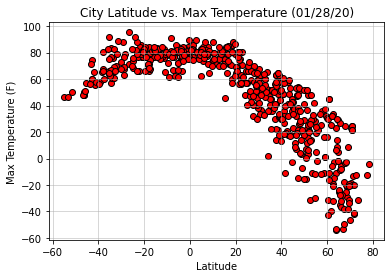

In [72]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolor = 'red', edgecolor = 'black')

#title
plt.title('City Latitude vs. Max Temperature (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Max Temperature (F)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city__latitude_vs_max_temperature.png')

## Latitude vs. Humidity Plot

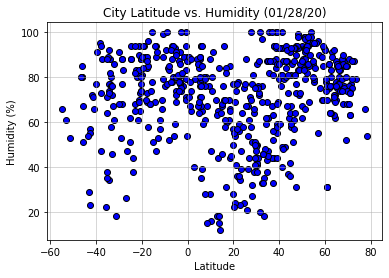

In [73]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolor = 'blue', edgecolor = 'black')

#title
plt.title('City Latitude vs. Humidity (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Humidity (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

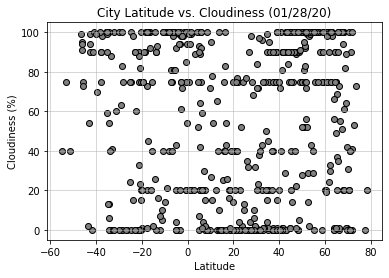

In [74]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolor = 'gray', edgecolor = 'black')

#title
plt.title('City Latitude vs. Cloudiness (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Cloudiness (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

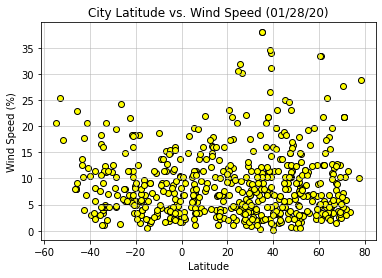

In [75]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolor = 'yellow', edgecolor = 'black')

#title
plt.title('City Latitude vs. Wind Speed (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Wind Speed (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Wind Speed.png')

## Linear Regression

In [76]:
#northern & southern dataframes
northern_hem = weather_df.loc[weather_df['Lat']>= 0]
southern_hem = weather_df.loc[weather_df['Lat']<= 0]

#functions for linear regression
def linear_regression(x,y):
    print(f'the r-value is: {round(st.pearsonr(x,y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y =' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, 'r-')
    return line_eq

#function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize = 15, color='orange')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: -0.86


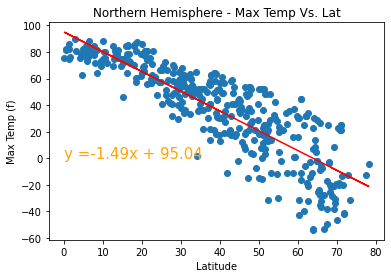

In [77]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Max Temp'])

annotate(equation, 0, 0)

plt.title('Northern Hemisphere - Max Temp Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_max_temp_vs_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.59


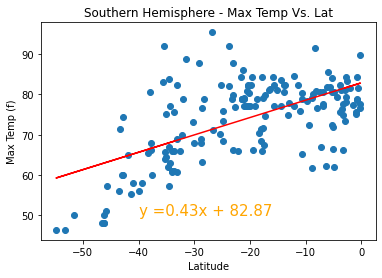

In [78]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Max Temp'])

annotate(equation, -40, 50)

plt.title('Southern Hemisphere - Max Temp Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_max_temp_vs_Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.31


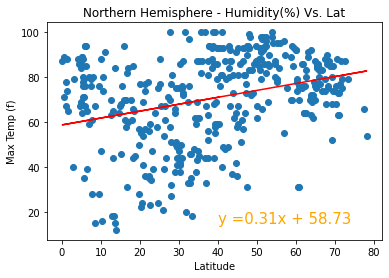

In [79]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Humidity'])

annotate(equation, 40, 15)

plt.title('Northern Hemisphere - Humidity(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_humidity_vs_Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.33


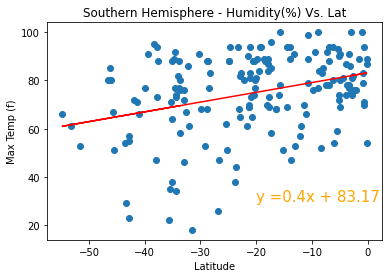

In [80]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Humidity'])

annotate(equation, -20, 30)

plt.title('Southern Hemisphere - Humidity(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_humidity_vs_Lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.25


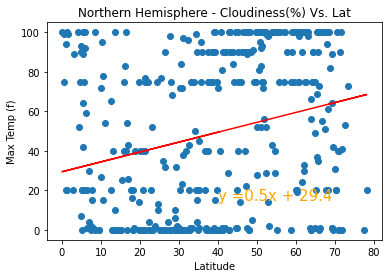

In [81]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Cloudiness'])

annotate(equation, 40, 15)

plt.title('Northern Hemisphere - Cloudiness(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_cloudiness_vs_Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.06


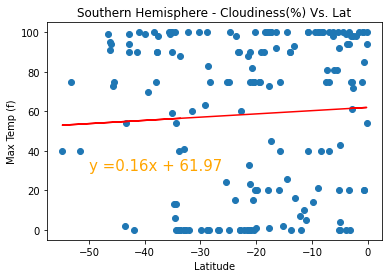

In [82]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Cloudiness'])

annotate(equation, -50, 30)

plt.title('Southern Hemisphere - Cloudiness(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_cloudiness_vs_Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.03


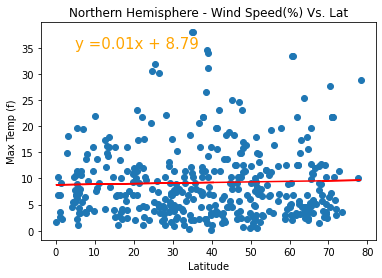

In [83]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Wind Speed'])

annotate(equation, 5, 35)

plt.title('Northern Hemisphere - Wind Speed(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_wind_speed_vs_Lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: -0.24


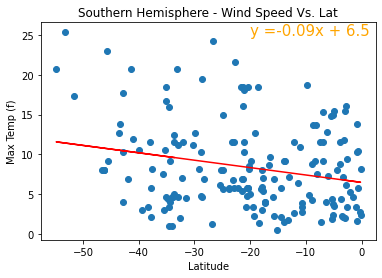

In [84]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Wind Speed'])

annotate(equation, -20, 25)

plt.title('Southern Hemisphere - Wind Speed Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_wind_speed_vs_Lat.png')